In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import os


<img src="../static/images/logo.jpg" alt="Project logo" width="500" height="600">

<h1> Agenda </h1>
<ul>
    <li>Personal Introduction</li>
    <li>Real World Problem</li>
    <li>Dataset</li>
    <li>Experimentation </li>
    <li>Our Solutions </li>
    <li>Evaluation</li>
    <li>Results</li>
</ul>

In [3]:
articles_df = pd.read_csv("../../recommender_systems/datasets/articles.csv")
transaction_df = pd.read_csv("../../recommender_systems/datasets/transactions_train.csv")
customers_df = pd.read_csv("../../recommender_systems/datasets/customers.csv")
pd.set_option("display.max_rows", None)

<h1>Real World Problem </h1>
    <ul>
        <li> Fashion, a huge business domain </li>
        <li> An enormous variety in modern day fashion trend </li>
        <li> Consumers are overwhelmed by choices </li>
        <li> Fashion Recommedation Systems narrows down choices</li>
        <li> H&M(Fashion Retailer) Dataset From Kaggle</li>
     </ul>
  


<h1> Dataset </h1>
   <ul>
        <li>H&M Transactions</li>
        <li>Items</li>
        <li>Customers</li>
        <li> Item Images </li>
    </ul>

In [10]:
print(f'Transactions: {transaction_df.shape}')
print(f'Items:        {articles_df.shape}')
print(f'Customers:    {customers_df.shape}')

Transactions: (31788324, 5)
Items:        (105542, 25)
Customers:    (1371980, 7)


In [11]:
transaction_df.head(2)

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2

In [12]:
articles_df.head(2)

article_id  product_code  prod_name  product_type_no product_type_name  \
0   108775015        108775  Strap top              253          Vest top   
1   108775044        108775  Strap top              253          Vest top   

   product_group_name  graphical_appearance_no graphical_appearance_name  \
0  Garment Upper body                  1010016                     Solid   
1  Garment Upper body                  1010016                     Solid   

   colour_group_code colour_group_name  ...  department_name index_code  \
0                  9             Black  ...     Jersey Basic          A   
1                 10             White  ...     Jersey Basic          A   

   index_name index_group_no  index_group_name section_no  \
0  Ladieswear              1        Ladieswear         16   
1  Ladieswear              1        Ladieswear         16   

             section_name garment_group_no  garment_group_name  \
0  Womens Everyday Basics             1002        Jersey Basic   
1  Womens Everyday Basics             1002        Jersey Basic   

                               detail_desc  
0  Jersey top with narrow shoulder straps.  
1  Jersey top with narrow shoulder straps.  

[2 rows x 25 columns]

In [13]:
customers_df.head(2)

customer_id  FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3... NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e... NaN     NaN   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...

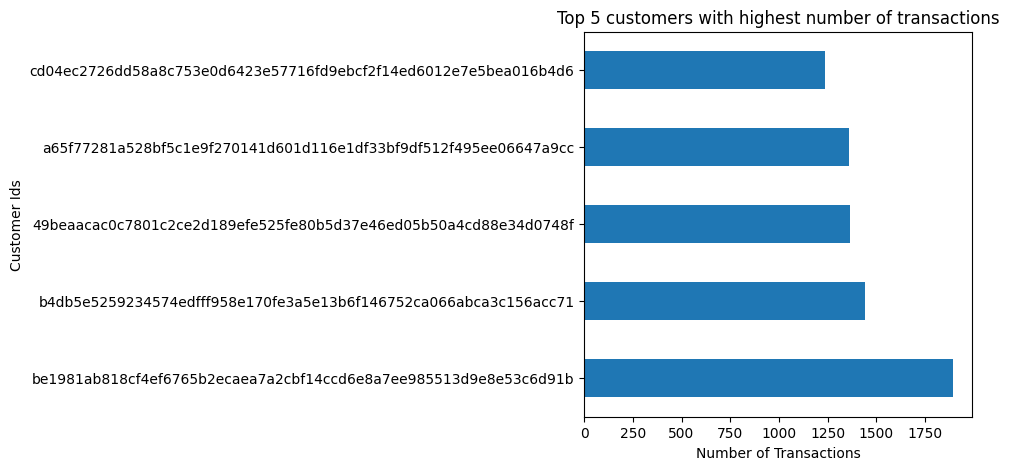

In [14]:
top_freq_cust = transaction_df['customer_id'].value_counts(dropna=False).nlargest(5)
top_freq_cust.plot(kind='barh',figsize=(5, 5),title="Top 5 customers with highest number of transactions",ylabel="Customer Ids",xlabel="Number of Transactions")
plt.show()

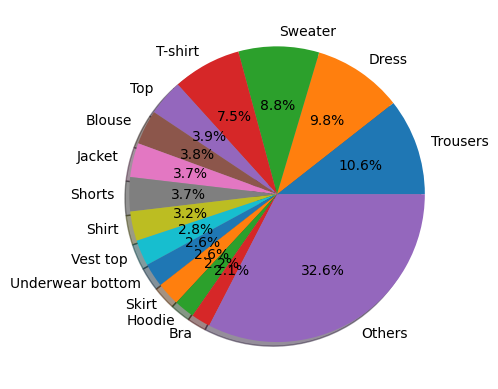

In [15]:
product_type_data = articles_df['product_type_name'].value_counts(dropna=False).nlargest(14)
product_type_data['Others'] = sum(articles_df['product_type_name'].value_counts(dropna=False)[14:].values)
type_labels = product_type_data.keys()
plt.pie(product_type_data,labels = type_labels,radius=1, autopct='%1.1f%%',shadow=True)
plt.show()

<img src="../static/images/img_dirs.jpg" width="500" height="600">

<img src="../static/images/img_dirs2.jpg" width="500" height="600">

<img src="../static/images/img_p.jpg" alt="Project logo" width="500" height="600">
<img src="../static/images/img_p2.jpg" alt="Project logo" width="500" height="600">

<h1>Experimentation</h1>
<p> Covered in the project report </p>

<h1>Our Solution - Fashion Recommender Systems</h1>
<ul>
        <li>Term Frequency - Inverse Term Frequency (Tf-idf)</li>
        <li>Binary Vectorization</li>
        <li>Image Activations from Convolutional neural network that classify cloth images</li>
        <li>Ensemble</li>
     </ul>


<h1>Evaluation</h1>
<img src="../static/images/results.jpg" width="500" height="600">



<img src="../static/images/bin_vec.jpg" alt="Matrix with binary entries that capture user-item interaction" width="500" height="600">
Each item is represented by a binary vector of d dimensions. Every element of the vector corresponds to the type of the item, for example trousers.
All of those vectors are collected as a matrix Q. Where Q(i) refers to the column in Q that refers to the  item i.

<img src="../static/images/bin.jpg" alt="Matrix with binary entries that capture user-item interaction" width="500" height="600">
<p> In the example above the user’s purchases are represented by binary values for example Alice bought Trousers and Shorts. Charlie bought Jacket. Bob Didn’t buy the trousers and so on.

Now we have two matrices P and Q, getting the product of these to the matrices will give us a similarity score. We can use many other similarity measures. However in our implementation we will use the cosine similarity.
</p>

In [22]:
articles_df = pd.read_csv("../datasets/articles_transactions_5.csv")
i = articles_df.copy()
i['detail_desc'] = i['detail_desc'].fillna("")
t = pd.read_csv("../datasets/transactions_5.csv")
fashion_classifier = load_model("../Weights/cnn3_new.h5")
embeddings_df = pd.read_csv('../Datasets/col_cnn_embeddings.csv')
cnn_cosine = cosine_similarity(embeddings_df.drop('image',axis=1))
images = embeddings_df['image'].values
cnn_cosine_df = pd.DataFrame(cnn_cosine, columns=images, index=images)

In [24]:

def cnn_recommender(customer):
    default_vals = cnn_cosine_df[775310002].sort_values(ascending=False).head(1)
    default_vals.iloc[0] = 0.0
    all_i_df = pd.DataFrame()
    all_i_df = pd.concat([all_i_df,default_vals])
    customer_purchases = t['article_id'][t['customer_id'] == customer].drop_duplicates().values
    for item in customer_purchases:
        cls = i['product_type_name'][i['article_id'] == item].values[0]
        if os.path.exists(f'../datasets/images/{cls.replace("/","")}/0{item}.jpg'):
            similar_imgs = cnn_cosine_df[item].sort_values(ascending=False)
            all_i_df = pd.concat([all_i_df,similar_imgs.nlargest(6)])[1:] 
    return all_i_df[0].nlargest(6)
def content_based_recommender_count(customer):
    all_items = pd.DataFrame()
    customer_purchases = t['article_id'][t['customer_id'] == customer].drop_duplicates().values
    for item in customer_purchases:
        sim_i = cosine_count_df[item].sort_values(ascending=False)
        all_items = pd.concat([all_items,sim_i.nlargest(6)])[1:]
    return all_items[0].nlargest(6)

In [25]:
def load_image(path):
    tar_image = load_img(path,target_size=(28, 28), color_mode ='grayscale') # trousers
    img_array = img_to_array(tar_image) # Image Tensor
    img_array = np.array([img_array]) 
    return img_array
def show_image(items_list):
    image_list = []
    
    for item_id in items_list:
        cls = i['product_type_name'][i['article_id'] == item_id].values[0]
        path = f'../datasets/images/{cls.replace("/","")}/0{item_id}.jpg'
        if os.path.exists(path):
            tar_image = load_img(path,target_size=(224, 224)) 
            image_list.append(tar_image)

    x,ax = plt.subplots(1,len(image_list),figsize=(224,224))
    plt.figure()
    for k,val in enumerate(image_list):
        ax[k].imshow(val)
    return 

In [33]:
count_vectorizer = CountVectorizer(binary=True,stop_words = "english")
profiles= count_vectorizer.fit_transform(i["detail_desc"])
cosine_sim_count  = cosine_similarity(profiles)
cosine_count_df = pd.DataFrame(cosine_sim_count, columns=i['article_id'], index=i['article_id'])


In [34]:
def content_based_recommender_count(customer):
    all_items = pd.DataFrame()
    customer_purchases = t['article_id'][t['customer_id'] == customer].drop_duplicates().values
    for item in customer_purchases:
        sim_i = cosine_count_df[item].sort_values(ascending=False)
        all_items = pd.concat([all_items,sim_i.nlargest(6)])[1:]
    return all_items[0].nlargest(6)

In [35]:
c = '65cb62c794232651e2ac711faa11c2b4e3d41d5f3b59b50bee3ffde1d5776644'

In [36]:
cnn_rec = cnn_recommender(c).index.values 

In [37]:
bv_rec = content_based_recommender_count(c).index.values

In [61]:
user_purch =t['article_id'][t['customer_id'] == c].drop_duplicates().values.tolist()
recommendations =np.concatenate([cnn_rec, bv_rec])
for r in recommendations:
    if r in user_purch:
        user_purch.remove(r)
if len(user_purch) > 8:
    user_purch = np.random.choice(user_purch,5)

<h2>Results</h2>

<h2>User Purchases</h2>

In [62]:
show_image(user_purch)

<Figure size 640x480 with 0 Axes>

<h2>Convolutional Neural Network Based Recommendendations </h2>

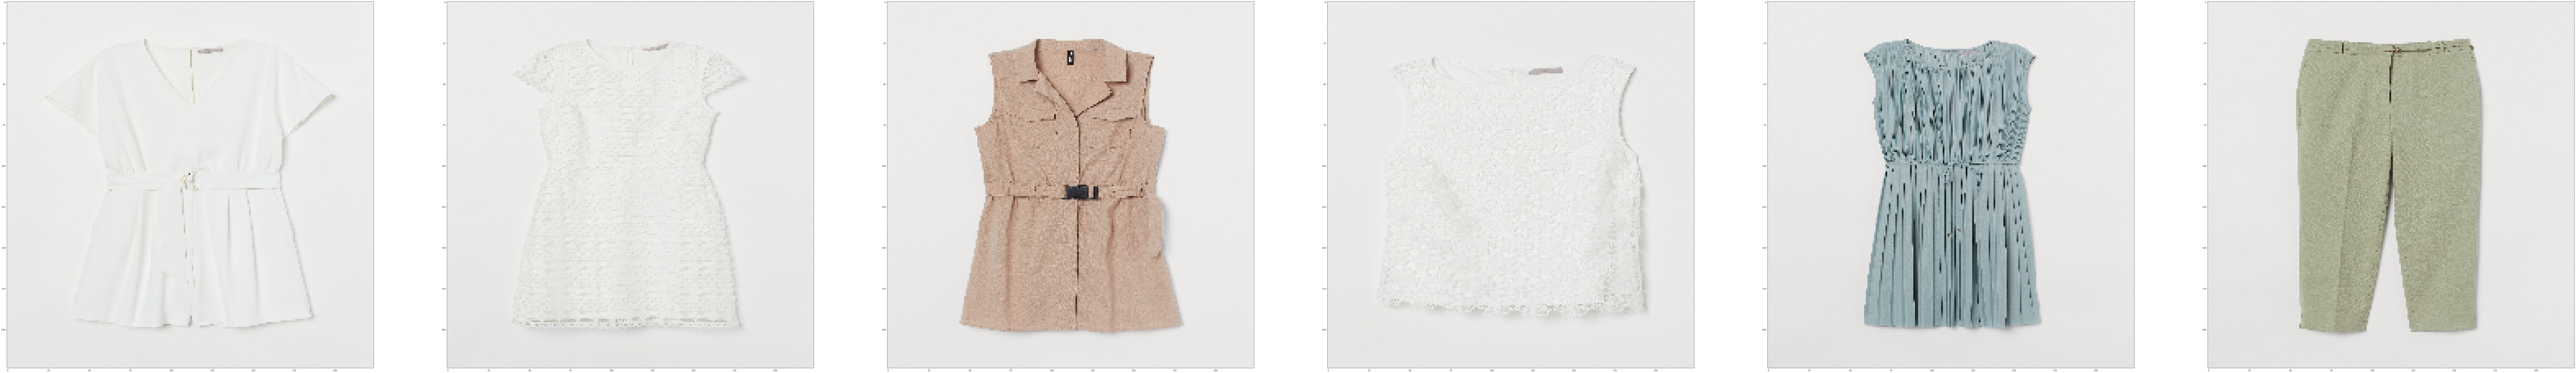

<Figure size 640x480 with 0 Axes>

In [201]:
show_image(cnn_rec)

<h2>Binary Vectorization based Recommendendations </h2>

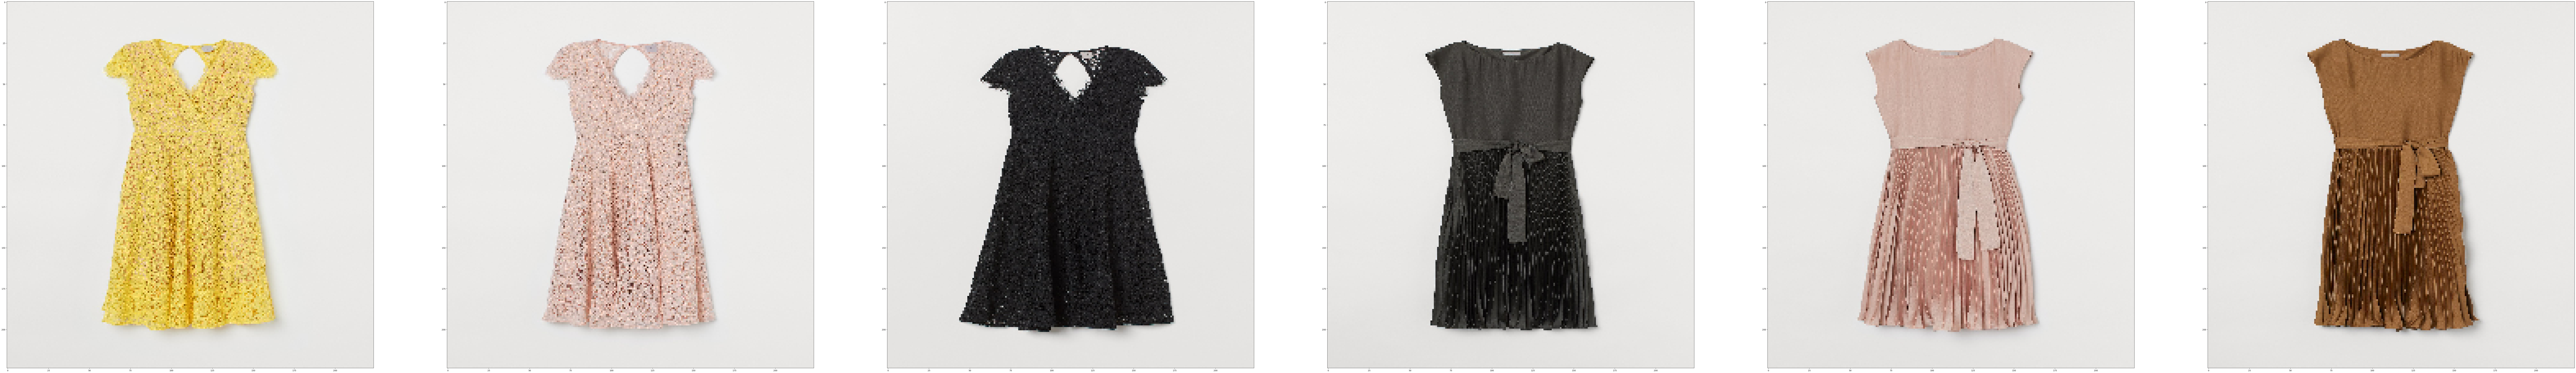

<Figure size 640x480 with 0 Axes>

In [200]:
show_image(bv_rec)


<img src="../static/images/tech.jpg" alt="Tech used in the project" width="500" height="600">

<h2>Thank You </h2>